In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [2]:
store_data = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
feature_data=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip')
sample_data=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')
train_data=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
test_data=pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip')

In [3]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
store_data['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [5]:
store_data.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [6]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

<AxesSubplot:ylabel='Weekly_Sales'>

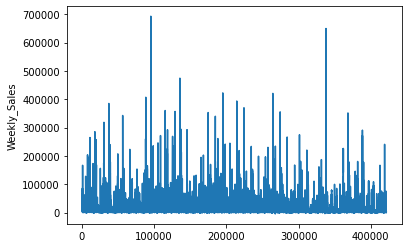

In [8]:
sns.lineplot(data=train_data,x=train_data.index, y="Weekly_Sales")

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

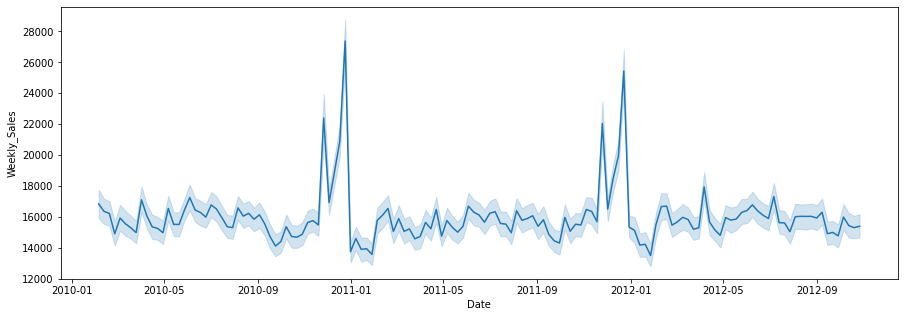

In [9]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=train_data,x=pd.to_datetime(train_data['Date']), y="Weekly_Sales")

Merge store data and train data

In [10]:
store_train_data=pd.merge(train_data, store_data)
store_train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

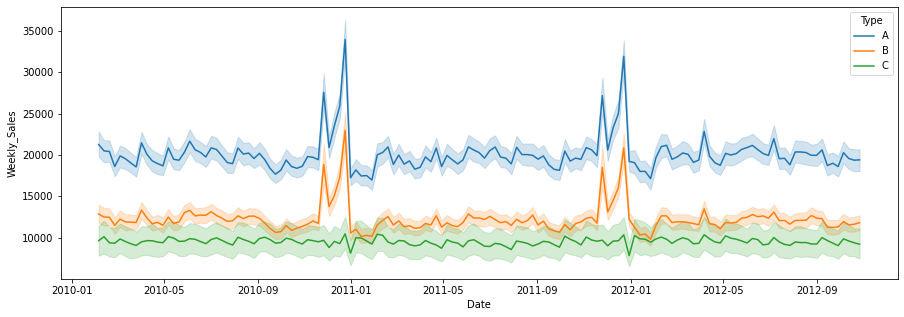

In [11]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=store_train_data,x=pd.to_datetime(store_train_data['Date']), y="Weekly_Sales", hue='Type')

In [12]:
store_train_data['Type'].replace({'A': 1, 'B': 2,'C':3},inplace=True)
store_train_data['Date']=pd.to_datetime(store_train_data['Date'])
store_train_data['Day']= pd.to_datetime(store_train_data['Date']).dt.day
store_train_data['Week']= pd.to_datetime(store_train_data['Date']).dt.week
store_train_data['Year']= pd.to_datetime(store_train_data['Date']).dt.year
store_train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Day,Week,Year
0,1,1,2010-02-05,24924.50,False,1,151315,5,5,2010
1,1,1,2010-02-12,46039.49,True,1,151315,12,6,2010
2,1,1,2010-02-19,41595.55,False,1,151315,19,7,2010
3,1,1,2010-02-26,19403.54,False,1,151315,26,8,2010
4,1,1,2010-03-05,21827.90,False,1,151315,5,9,2010


In [13]:
weekly_sales_2010= store_train_data[store_train_data['Year']==2010]['Weekly_Sales'].groupby(store_train_data['Week']).mean()
weekly_sales_2011= store_train_data[store_train_data['Year']==2011]['Weekly_Sales'].groupby(store_train_data['Week']).mean()
weekly_sales_2012= store_train_data[store_train_data['Year']==2012]['Weekly_Sales'].groupby(store_train_data['Week']).mean()

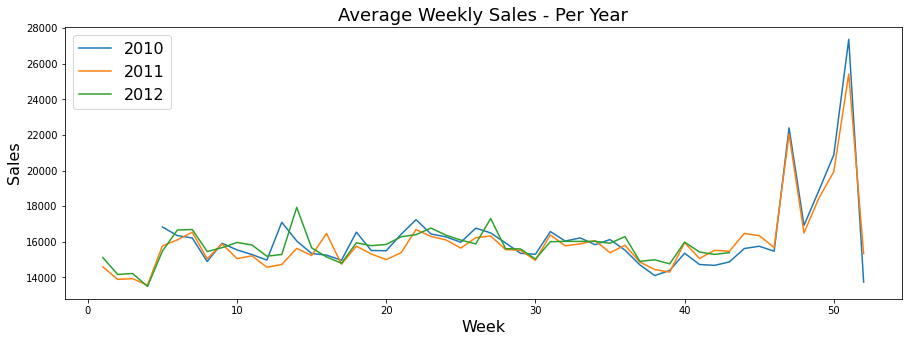

In [14]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

Merge store data and test data

In [15]:
store_test_data=pd.merge(test_data, store_data)
store_test_data.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


In [16]:
store_test_data['Type'].replace({'A': 1, 'B': 2,'C':3},inplace=True)
store_test_data['Date']=pd.to_datetime(store_test_data['Date'])
store_test_data['Day']= pd.to_datetime(store_test_data['Date']).dt.day
store_test_data['Week']= pd.to_datetime(store_test_data['Date']).dt.week
store_test_data['Year']= pd.to_datetime(store_test_data['Date']).dt.year
store_test_data.head()

,Store,Dept,Date,IsHoliday,Type,Size,Day,Week,Year
0,1,1,2012-11-02,False,1,151315,2,44,2012
1,1,1,2012-11-09,False,1,151315,9,45,2012
2,1,1,2012-11-16,False,1,151315,16,46,2012
3,1,1,2012-11-23,True,1,151315,23,47,2012
4,1,1,2012-11-30,False,1,151315,30,48,2012


In [17]:
X=store_train_data.loc[:, store_train_data.columns!='Weekly_Sales'].drop('Date', axis=1)
Y=store_train_data.loc[:, store_train_data.columns=='Weekly_Sales']

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
model = RandomForestRegressor()
model.fit(X, Y)

RandomForestRegressor()

In [20]:
store_test_data['Weekly_Sales'] = model.predict(store_test_data.drop('Date',axis=1))

In [21]:
store_test_data.head()

,Store,Dept,Date,IsHoliday,Type,Size,Day,Week,Year,Weekly_Sales
0,1,1,2012-11-02,False,1,151315,2,44,2012,36589.2701
1,1,1,2012-11-09,False,1,151315,9,45,2012,20645.7973
2,1,1,2012-11-16,False,1,151315,16,46,2012,19379.9812
3,1,1,2012-11-23,True,1,151315,23,47,2012,20203.4957
4,1,1,2012-11-30,False,1,151315,30,48,2012,27723.8246


In [22]:
sample_data['Weekly_Sales']=store_test_data['Weekly_Sales']

In [23]:
sample_data.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,36589.2701
1,1_1_2012-11-09,20645.7973
2,1_1_2012-11-16,19379.9812
3,1_1_2012-11-23,20203.4957
4,1_1_2012-11-30,27723.8246


In [24]:
sample_data.to_csv('submission.csv',index=False)
sample_data

,Id,Weekly_Sales
0,1_1_2012-11-02,36589.2701
1,1_1_2012-11-09,20645.7973
2,1_1_2012-11-16,19379.9812
3,1_1_2012-11-23,20203.4957
4,1_1_2012-11-30,27723.8246
...,...,...
115059,45_98_2013-06-28,664.4189
115060,45_98_2013-07-05,688.1749
115061,45_98_2013-07-12,763.5543
115062,45_98_2013-07-19,779.4751
